In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from decimal import Decimal

# Graphs
Sander Hansen - 10995080

<img src="fig1.png">


## Questions
### 1 
*Consider the undirected entwork depicted in Figure 1.*
    
(a) *Draw a histogram of the degrees in this network.*
    


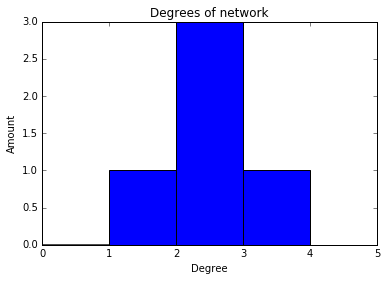

In [2]:
mu, sigma = 100, 15
x = np.array([1, 2, 3, 2, 2])

plt.hist(x, bins=[0,1,2,3,4,5], facecolor='blue')

plt.xlabel("Degree")
plt.ylabel("Amount")
plt.title("Degrees of network")
plt.axis([0, 5, 0, 3])

plt.show()

(b) *Write the adjacency matrix of this network.*
    
$$
A_{ij} = \left(\begin{array}{cc} 
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 1 \\
0 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 & 0
\end{array}\right)
$$ 


   (c) *Compute two different types of centrality for each vertex (you can choose which two; see the link on the first page) by hand, and describe how you did it.*
    
We will calculate the normalized and the closeness centrality for each vertex. 
    
| Vertex | Normalized Centrality | Closeness Centrality |
|--------|-----------------------|----------------------|
| 1      | 0.25                  | $\frac{4}{9}$        |
| 2      | 0.5                   | $\frac{4}{6}$        |
| 3      | 0.75                  | $\frac{4}{5}$        |
| 4      | 0.5                   | $\frac{4}{7}$        |
| 5      | 0.5                   | $\frac{4}{7}$        |

The normalized is calculated by taking the number of edges a certain vertex has and divide it by the total number of vertices - 1.

The closeness centrality is calculated by summing up the distance to all the other nodes. Divide the result by the number of vertices - 1 and put this to the power of -1. This will give you the desired result.

(d) *The vector of the degree per vertex can be obtained by a suitable, single matrix-vector multiplication. Show how and explain why.*

If we multiply the adjacency vector with the following vector;

$$
B = \left(\begin{array}{cc} 
1 \\
1 \\
1 \\
1 \\
1
\end{array}\right)
$$

We will get;

$$
C = \left(\begin{array}{cc} 
1 & 1 & 0 & 0 & 0 \\
1 & 2 & 1 & 0 & 0 \\
0 & 1 & 3 & 1 & 1 \\
0 & 0 & 1 & 2 & 1 \\
0 & 0 & 1 & 1 & 2
\end{array}\right)
$$

This for the simple reason that the B vector will sum up the rows. The rows contain all the vertices a vertex is connected with. So you will get the amount over vertices a certain vertex is connected with in the diagonal.

(e) *We can convert this undirected network to a directed one by choosing one of two possible directions for every edge. Prove that no such ’directionalization’ exists such that from all vertices you could reach (or infect) the entire network.*

We can simply see that that if we would make the edge between vertice 1 and 2 directed they can't reach eachother. It doesn't matter in which direction you would make this edge. If it's directed from 1 to 2, 1 can't be reached by any other node. If you would direct it from 2 to 1, 1 can't reach any node.

(f) *Compute the local clustering coefficient for every vertex.*

| Vertex | Local Clustering Coefficient |
|--------|------------------------------|
| 1      | 0                            |
| 2      |  0                           |
| 3      | $\frac{1}{3}$                |
| 4      | 1                            |
| 5      | 1                            |

This was calculated using the following formula;

$$C_{i} = \frac{2e_{i}}{k_{i}(k_{i}-1}$$

(g) *What is the minimum number of edges that must be added so that the clustering coefficient is 1 for every vertex? Why?*

We need a complete graph to achieve this. So we will need to add 5 edges.The clustering coefficient is measuring how close it is to a full graph, so it makes sense that to get the highest clustering coefficient we need to have this complete graph.

### 2 
*Consider a random (Erdos-Renyi) network of N nodes and a probability p per possible edge to be present in the network.*

(a) What is the expression for the probability distribution for the degree of a single vertex? Why is this the right type of probability distribution?

$$P(k)=(\frac{N-1}{k})p^{k}(1-p)^{(N-1)-k}$$

<span style="color:red">MOET NOG</span>

### Epidemics, question 1

(a) *Suppose that a susceptible vertex has r infected neighbors in a certain time step. What is the probability that the vertex is not infected in the next time step? What is the probability that it does become infected?*

A neighbour has a chance of $i$ of infecting you. So if it has $r$ neighbours it will have a chance of $ri$ of getting infected with a maximum of 1. The chance of not getting infected is equal to $r * (1 - i)$ with a minimum of 0.

(b) *Implement this model for random (Erdos-Renyi) networks, using Python. Review Appendix A for advice on how to do this. Show one figure with the expected evolution of I/N (i.e., normalized ‘prevalence’) over time for two cases: (i) $N = 10^5$, $i = 0.01$, $k = 5.0$, and (ii) $N = 10^5$, $i = 0.1$, $k = 0.8.$* 

*Seed the simulation by infecting 0.1% random vertices. Note that we want to see the expected behavior, so you’ll need to average over enough simulations for each case to get a smooth curve, preferably including confidence intervals or error bars.*

In [3]:
def init(N, i, k, start):
    G = nx.fast_gnp_random_graph(N, k / N)
    G.graph['N'] = N
    G.graph['i'] = i
    G.graph['Infected'] = int(N*start)

    ind = np.arange(N)
    np.random.shuffle(ind)
    ind = ind[:int(N*start)]

    # Set everything to not infected
    nx.set_node_attributes(G, 'SI', 0)

    # Set start nodes to infected
    for i in ind:
        G.node[i]['SI'] = 1

    return G

def step(G):    
    for node in G.nodes():
        if G.node[node]['SI'] == 1:
            for neighbor in G.neighbors(node):
                if G.node[neighbor]['SI'] == 0:
                    infected = np.random.choice(2, 1, 
                                                p=[1 - G.graph['i'], 
                                                G.graph['i']])
                    G.node[neighbor]['SI'] = infected
                    G.graph['Infected'] += infected

    return G

G = init(10**5, 0.01, 5.0, 0.001)
G2 = init(10**5, 0.1, 0.8, 0.001)

timesteps = 1000
G_infected = np.zeros(timesteps)
G2_infected = np.zeros(timesteps)

for i in range(timesteps):
    G = step(G)
    G_infected[i] = G.graph['Infected']
    G2 = step(G2)
    G2_infected[i] = G2.graph['Infected']
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
np.savetxt("G_infected.csv", G_infected, delimiter=",")
np.savetxt("G2_infected.csv", G2_infected, delimiter=",")

NameError: name 'G_infected' is not defined

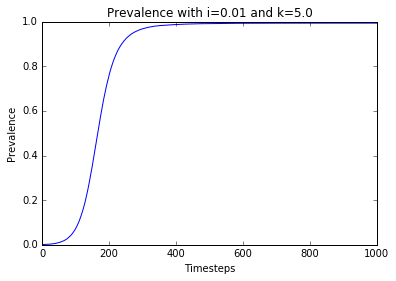

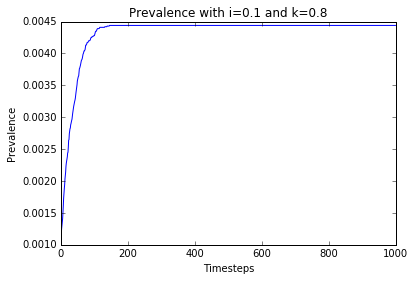

In [20]:
x = np.arange(1000)
plt.plot(x, G_infected / 10**5)
plt.title("Prevalence with i=0.01 and k=5.0")
plt.xlabel("Timesteps")
plt.ylabel("Prevalence")
plt.show()

plt.plot(x, G2_infected / 10**5)
plt.title("Prevalence with i=0.1 and k=0.8")
plt.xlabel("Timesteps")
plt.ylabel("Prevalence")
plt.show()

(c) *We can see that, initially, one case grows faster than the other. Could we have predicted this beforehand, by looking only at the values N,i,k?*
Yes we could have predicted this. Although i is higher in the second case, k is way lower. It's even below one. This will mean that many vertices will not be connected. Therefore the infected vertices are probably isolated and after a certain moment of time no more vertices can be infected.

(d) *We see two ‘opposing forces’, namely a higher infection probability but a lower connectivity, so it is not so clear at first sight. Let’s look more closely. In the early phase of the epidemic, it is highly likely that all neighbors of an infected vertex are susceptible. Assume this is the case, and write the expression for the probability that a vertex with (say) k edges infects at least one neighbor.*
This would be $ik$ with a limit of 1.

(e) *Compute this probability numerically in each of the two cases, for the first time step. Check this result by comparing it to the initial ordering5 of the two curves for question (2b); does the ordering correspond?*

We will divide the amount of new infections by the amount of existing infections for the numerically cases. Then we can compare this with $1-(1-i)^k$.

In [41]:
G_infected = np.loadtxt("G_infected.csv", delimiter=",")
G2_infected = np.loadtxt("G2_infected.csv", delimiter=",")

new_infections = float(G_infected[1]) - float(G_infected[0])

print("Case one; k = 5.0, i = 0.01")
print("k * i = %.3f" %(0.01 * 5))
print("Real value = %.3f" %(new_infections / float(G_infected[0])))

new_infections2 = float(G2_infected[1]) - float(G2_infected[0])

print("\nCase two; k = 0.8, i = 0.1")
print("k * i = %.3f" %(0.1 * 0.8))
print("Real value = %.3f" %(new_infections2 / float(G2_infected[0])))


Case one; k = 5.0, i = 0.01
k * i = 0.050
Real value = 0.047

Case two; k = 0.8, i = 0.1
k * i = 0.080
Real value = 0.054


The second case is in a higher order the value is also higher so this will correspond with the ordering.

(f) *Derive (analytically) the expression for the expected number of new infections in the first time step per infected vertex in both cases, i.e., I'(t)/I(t) = (I(t + 1) − I(t)) /I(t). This number is called the ‘reproduction number’ in epidemiology and often denoted R0.* 

$$R_0 = I(t) * i * k$$

(g) *Use the ratio of the two reproduction numbers to quantify exactly how much faster/slower case (i) is expected to grow compared to case (ii) in the beginning.*

$$R_0\ from\ i = 100 * 0.01 * 0.5 = 0.5$$
$$R_0\ from\ ii = 100 * 0.1 * 0.8 = 8$$

(h) *Can you visually verify the absolute value of this ratio for question (2g) using your numerical results? Try it, by plotting one figure with two curves which approximate the R0 over time for each case, using your numerically calculated (averaged) I(t). Does it seem to correspond well, in the beginning? (If your curves are too jumpy, run additional simulations for better averaging.)*

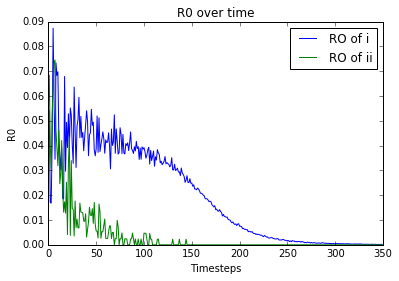

In [42]:
R0_1 = np.zeros(350)
R0_2 = np.zeros(350)

x = np.arange(350)

for i in x:
    R0_1[i] = (G_infected[i + 1] - G_infected[i]) / G_infected[i]
    R0_2[i] = (G2_infected[i + 1] - G2_infected[i]) / G2_infected[i]
    
plt.plot(x, R0_1, x, R0_2)
plt.legend(["RO of i", "RO of ii"])
plt.title("R0 over time")
plt.xlabel("Timesteps")
plt.ylabel("R0")
plt.show()

(i) *Why do these curves drop off to zero? And why does the top curve drop to zero faster than the bottom one?* 

Because at some point the amount of infections are 'statisfied'. People who are already infected can't get infected again. So their will be no new infections. Because there are less connections it will drop off to zero way faster. It simply can't infect more over time cause it doesn't have any more connections.

(j) *Now, we want to consider the final phase of the two epidemics. In your figure for question (2b), we see that they settle to different final outbreak sizes. Explain, based on graph theory, why you would expect this to happen.*

In the first case we can see it grows exponentionaly. The infection rate may be slow but there are many connections so one infected vertex can infect many. Then it will slow down because almost every other vertex is already infected.
In the second case the average k is way lower. It's lower then 1. So many vertices will not have connections at all. So there will be a lot of so called islands. Without neighbors it's not possible to infect others.

(k) *As N → ∞, how will both final outbreak sizes grow as function of N? Your answer may omit constants*.

Only N and k have influence on the outbreak size so it will grow linear. With the following formula;

$$N * k * c$$

### Epidemics, question 2

(a) *The first thing to note is that there is now a b parameter which is not equivalent to the i parameter above. That is, we cannot simply set b = i and then expect that this ODE will be an approximation of the networked models above. Explain briefly why*

We don't have the k parameter anymore, this for the simple reason that everything is connected to each other. So b is a function of K and i.

(b) *To make the ODE approximate the networked models above, we need to compute a value for b, based on i. We can require that the two models will have the same behaviour in the beginning, by making the initial values of R0 equal, using this equation:*

$$(1-(1-b)^t)*S=(1-(1-i)^{\frac{<k>}{N}I})*S$$

*Derive the expression for b = ... from this equation.*

$$(1-(1-b)^I)*S=(1-(1-i)^{\frac{<k>}{N}I})*S \\
1-(1-b)^I=1-(1-i)^{\frac{<k>}{N}I} \\
(1-b)^I=(1-i)^{\frac{<k>}{N}I} \\
(1-b)^I=(1-i)^{\frac{<k>}{N}I}\\
1 - b = \sqrt[I]{(1-i)^{\frac{<k>}{N}I}}\\ 
1 - b = (1-i)^{\frac{<k>}{N}}\\
b = -(1-i)^{\frac{<k>}{N}} + 1
$$

(c) *Use this expression to compute the two numerical values  corresponding to the above two networked cases; write the results up to 2 decimals*


In [54]:
def b(i, k, N):
    return -(1-i)**(k/N)+1


b1 = b(0.01, 5.0, 10**5)
b2 = b(0.1, 0.8, 10**5)

print("bi = %.2E" %b1)
print("bii = %.2E" %b2)

bi = 5.03E-07
bii = 8.43E-07


### Epidemics, question 3
(a) *In the first exercise sheet (ODEs) of the Networks part of this course you should have implemented the Euler algorithm for numerically approximating the solution of an ODE. Extend this algorithm to support a coupled ODE of two functions (namely, I and S).*

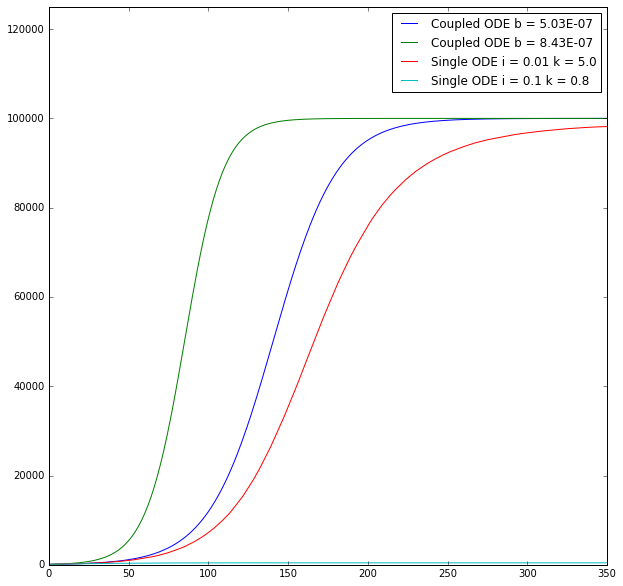

In [64]:
def I(b, I, S):
    return (1 - ( 1 - b)**(I)) * S   
    
def S(b, I, S):
    return -(1 - ( 1 - b)**(I)) * S   
    
def simple_euler(I, S, b, I0, S0, h, t0, t):
    resultI = np.array([I0])
    for _ in range(int(t - t0 / h)):
        INEW = I0 + (I(b, I0, S0) * h)
        S0 = S0 + (S(b, I0, S0) * h)
        I0 = INEW
              
        t0 = t0 + h
        resultI = np.append(resultI, [I0])

    return resultI

I1 = simple_euler(I, S, b1, 100.0, 10**5 - 100.0, 1.0, 0.0, 350)
t1 = np.linspace(0, 350, I1.shape[0])

I2 = simple_euler(I, S, b2, 100.0, 10**5 - 100.0, 1.0, 0.0, 350)
t2 = np.linspace(0, 350, I2.shape[0])

x = np.arange(1000)
plt.figure(figsize=(10,10))
plt.plot(t1, I1, t2, I2, x, G_infected, x, G2_infected)
plt.legend(["Coupled ODE b = %.2E" %b1,
            "Coupled ODE b = %.2E" %b2,
            "Single ODE i = 0.01 k = 5.0",
            "Single ODE i = 0.1 k = 0.8"])
plt.axis([0, 350, 0, 125000])
plt.show()


(b) *If you did everything correctly, then the ODE should approximate one case relatively well, but the other case should deviate more significantly, at least in the final phase. Explain (briefly) what could cause the difference.*

We got the value of the coupled ODE with a B of aprox 8.43*10-7 form a network which has a degree of N(N-1)/2. The single ODE with i = 0.1 had a avarage degree of 0.8 so this is way lower. There are no 'islands' in the coupled implementation.

(c) *Looking at the previous figure, it looks like both the ODE and the random network model have an initial phase of a certain type of growth of the prevalence. Explain what type of growth it is, and justify your answer using the formulas.*

This is called logistic growth. This has to do with both exponential growth and decay. The function;



